<a href="https://colab.research.google.com/github/Sir-MuEl/demo/blob/master/Excellent_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
train = df_train.copy()
test = df_test.copy()

In [ ]:
train.shape

(4990, 13)

In [ ]:
test.shape

(3532, 12)

In [ ]:
train.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [ ]:
test.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type
0,DRA59,BABATUNJI010,DRA59_BABATUNJI010,8.270,Normal Sugar,0.214125,Soft Drinks,459.98,2005,NaN,Cluster 3,Grocery Store
1,DRA59,BABATUNJI013,DRA59_BABATUNJI013,8.270,Normal Sugar,0.127821,Soft Drinks,464.98,1994,High,Cluster 3,Supermarket Type1
2,DRB01,BABATUNJI013,DRB01_BABATUNJI013,7.390,Low Sugar,0.082171,Soft Drinks,477.38,1994,High,Cluster 3,Supermarket Type1
3,DRB13,BABATUNJI010,DRB13_BABATUNJI010,6.115,Normal Sugar,0.011791,Soft Drinks,472.63,2005,NaN,Cluster 3,Grocery Store
4,DRB13,BABATUNJI013,DRB13_BABATUNJI013,6.115,Normal Sugar,0.007038,Soft Drinks,473.13,1994,High,Cluster 3,Supermarket Type1


In [ ]:
g = train[train['Store_Size'].notna()]

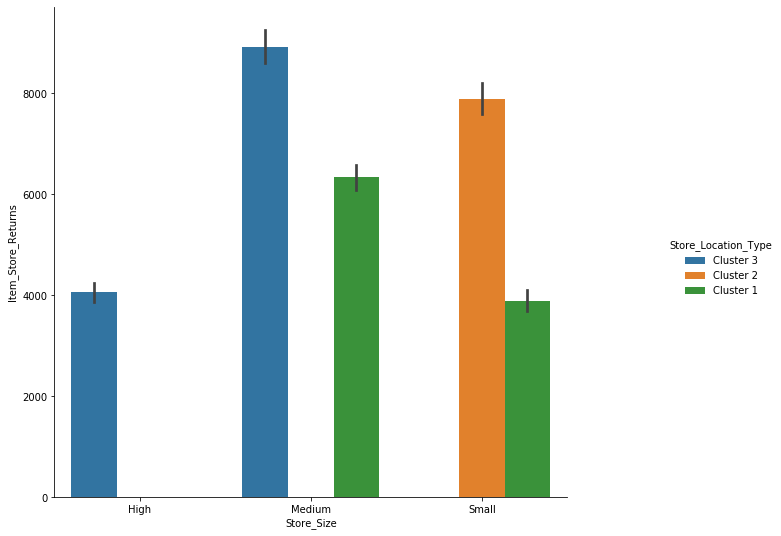

In [ ]:
plot = sns.catplot(x = 'Store_Size', y = 'Item_Store_Returns', data = g, hue = 'Store_Location_Type', kind = 'bar')
plot.fig.set_figwidth(12)
plot.fig.set_figheight(8)

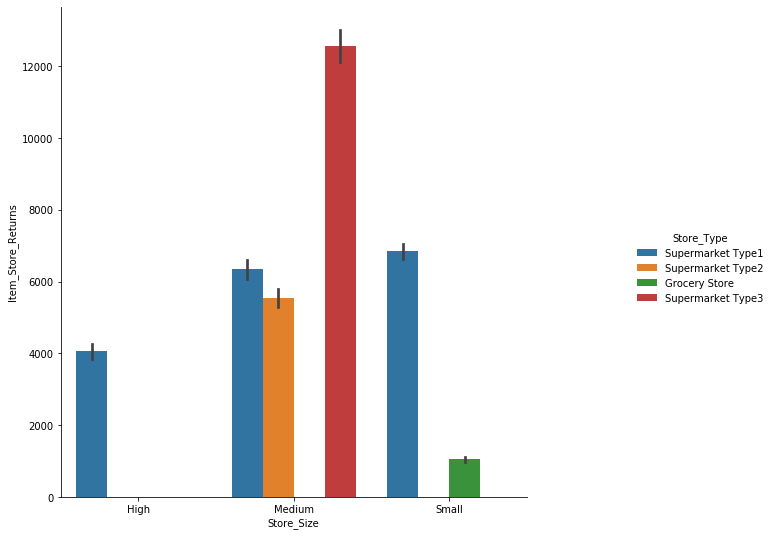

In [ ]:
plot = sns.catplot(x = 'Store_Size', y = 'Item_Store_Returns', data = g, hue = 'Store_Type', kind = 'bar')
plot.fig.set_figwidth(12)
plot.fig.set_figheight(8)

In [ ]:
f = test[test['Store_Size'].notna()]

In [ ]:
f[f['Store_Type'] == 'Grocery Store']['Store_Type'].value_counts()

Grocery Store    188
Name: Store_Type, dtype: int64

In [ ]:
def impute(col):
    Type = col[0]
    Size = col[1]
    
    if pd.isna(Size):
        if Type == 'Grocery Store':
            return 'Small'
        else:
            return (Size)
    else:
        return (Size)

In [ ]:
train['Store_Size'] = train[['Store_Type', 'Store_Size']].apply(impute, axis=1)

In [ ]:
def impute_cluster(col):
    Loc_Type = col[0]
    Size = col[1]
    
    if pd.isna(Size):
        if Loc_Type == 'Cluster 2':
            return('Small')
        else:
            return (Size)
    else:
        return (Size)

In [ ]:
train['Store_Size'] = train[['Store_Location_Type', 'Store_Size']].apply(impute_cluster, axis =1)

In [ ]:
test['Store_Size'].fillna('Small', inplace = True)

In [ ]:
train['Item_Weight'].fillna(np.mean(train['Item_Weight']), inplace = True)
test['Item_Weight'].fillna(np.mean(train['Item_Weight']), inplace =True)

Label Binarizer / pd.getdummies - [Store_Type, Store Location Type]
Label Encoder / Ordinal Encoder - ['Store Size', 'Item Sugar Content', 'Item Type', 'Store Start Year', 'Store ID']

In [ ]:
Train_Value = train['Item_Store_Returns']
y = Train_Value.copy()
train.drop(['Item_Store_Returns'], inplace = True, axis =1)

In [ ]:
bin_cols = ['Store_Location_Type', 'Store_Type', 'Item_Sugar_Content', 'Store_Size']
orcoder_cols = ['Store_ID', 'Item_Type', 'Store_Start_Year']

In [ ]:
all_data = pd.concat([train, test], )
a_data = all_data.copy()
a_data = pd.get_dummies(all_data, prefix_sep = '-', columns = bin_cols, drop_first = True, )

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
orcoder = OrdinalEncoder()

a_data[orcoder_cols] = orcoder.fit_transform(a_data[orcoder_cols])

In [ ]:
a_data['Price_Per_Weight'] = a_data['Item_Price'] / a_data['Item_Weight']
a_data['Visbility_Per_Weight'] = a_data['Item_Visibility'] / a_data['Item_Weight']
a_data['Item_Volume'] = a_data['Item_Visibility'] * a_data['Item_Weight']
a_data['Tangibility'] = a_data['Item_Visibility'] * a_data['Item_Price']
a_data.drop(['Item_ID', 'Item_Store_ID'], axis = 1, inplace = True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
a_data['Item_Price_Scaled'] = scaler.fit_transform(np.array(a_data['Item_Price']).reshape(-1,1))

In [ ]:
r = train.shape[0]

new_train = a_data[:r]
new_test = a_data[r:]

In [ ]:
new_train.head()

,Store_ID,Item_Weight,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Location_Type-Cluster 2,Store_Location_Type-Cluster 3,Store_Type-Supermarket Type1,Store_Type-Supermarket Type2,Store_Type-Supermarket Type3,Item_Sugar_Content-Normal Sugar,Item_Sugar_Content-Ultra Low Sugar,Store_Size-Medium,Store_Size-Small,Price_Per_Weight,Visbility_Per_Weight,Item_Volume,Tangibility,Item_Price_Scaled
0,0.0,11.6,0.068535,14.0,357.54,3.0,0,1,0,0,0,0,0,0,1,30.822414,0.005908,0.795006,24.504018,0.032555
1,1.0,11.6,0.040912,14.0,355.79,1.0,0,1,1,0,0,0,0,0,0,30.671552,0.003527,0.474577,14.556018,0.021314
2,2.0,11.6,0.041178,14.0,350.79,7.0,1,0,1,0,0,0,0,0,1,30.240517,0.003550,0.477659,14.444657,-0.010802
3,3.0,11.6,0.041113,14.0,355.04,8.0,0,1,0,1,0,0,0,1,0,30.606897,0.003544,0.476907,14.596651,0.016497
4,6.0,11.6,0.000000,14.0,354.79,6.0,1,0,1,0,0,0,1,0,1,30.585345,0.000000,0.000000,0.000000,0.014891


In [ ]:
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

**Linear Regression**

In [ ]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(new_train, y)  
#Fitting the data to model
model.fit(X_rfe,y)
#print('\n', rfe.support_)
#print('\n', rfe.ranking_)

col = new_train.columns
val = rfe.ranking_

feat_importance = dict(zip(val, col))

print (feat_importance)

{6: 'Store_ID', 11: 'Item_Weight', 2: 'Item_Visibility', 12: 'Item_Type', 10: 'Item_Price', 5: 'Store_Start_Year', 1: 'Visbility_Per_Weight', 4: 'Store_Location_Type-Cluster 3', 7: 'Item_Sugar_Content-Normal Sugar', 8: 'Item_Sugar_Content-Ultra Low Sugar', 13: 'Price_Per_Weight', 3: 'Item_Volume', 9: 'Tangibility', 14: 'Item_Price_Scaled'}


In [ ]:
lin_reg_cols = []
for i in feat_importance:
    if i <= 14:
        lin_reg_cols.append(feat_importance[i])

In [ ]:
lin_reg = LinearRegression()

new_train_lin_reg = new_train[lin_reg_cols]
new_test_lin_reg = new_test[lin_reg_cols]

X_train_lin_reg, X_test_lin_reg, y_train, y_test = train_test_split(new_train_lin_reg, y, test_size = 0.2, random_state = 101)
lin_reg.fit(X_train_lin_reg, y_train)
pred_lin_reg =lin_reg.predict(X_test_lin_reg)

In [ ]:
cv_lin_reg = cross_val_score(lin_reg, new_train_lin_reg, y, scoring = 'neg_root_mean_squared_error', cv = 10)
np.mean(cv_lin_reg)

-3540.459317470225

In [ ]:
print(np.sqrt(mean_squared_error(y_test, pred_lin_reg)))

3612.4292226605526


**Random Forest Regressor**

In [ ]:
model = RandomForestRegressor()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(new_train, y)  
#Fitting the data to model
model.fit(X_rfe,y)
#print('\n', rfe.support_)
#print('\n', rfe.ranking_)

col = new_train.columns
val = rfe.ranking_

feat_importance = dict(zip(val, col))

print (feat_importance)

{7: 'Store_ID', 6: 'Item_Weight', 5: 'Item_Visibility', 4: 'Item_Type', 1: 'Item_Price_Scaled', 13: 'Store_Location_Type-Cluster 2', 11: 'Store_Location_Type-Cluster 3', 2: 'Store_Type-Supermarket Type1', 14: 'Store_Type-Supermarket Type2', 8: 'Item_Sugar_Content-Normal Sugar', 9: 'Item_Sugar_Content-Ultra Low Sugar', 12: 'Store_Size-Medium', 10: 'Store_Size-Small', 3: 'Item_Volume'}


In [ ]:
rforest_cols = []
for i in feat_importance:
    if i <= 8:
        rforest_cols.append(feat_importance[i])

'''param_grid = {
    'bootstrap': [True],
    'max_depth': [120,130],
    'max_features': ['log2', 'sqrt'],
    'min_samples_leaf': [5,6],
    'min_samples_split': [30,40],
    'n_estimators': [350,400]
}
estimator = RandomForestRegressor()
grid = GridSearchCV(estimator, param_grid, scoring = 'neg_root_mean_squared_error')
grid.fit(X_train_rforest, y_train)

print (grid.best_score_, grid.best_params_)
forest = grid.best_estimator_
print('\n', forest)'''

In [ ]:
rforest =   RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=120, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=40, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
new_train_rforest = new_train[rforest_cols]
new_test_rforest = new_test[rforest_cols]

X_train_rforest, X_test_rforest, y_train, y_test = train_test_split(new_train_rforest, y, test_size = 0.2, random_state = 101)
rforest.fit(X_train_rforest, y_train)
pred_rforest = rforest.predict(X_test_rforest)

In [ ]:
rforest_cv = cross_val_score(rforest, X_train_rforest, y_train, scoring = 'neg_root_mean_squared_error', cv = 10 )
np.mean(rforest_cv)

-2942.7112848641755

In [ ]:
print(np.sqrt(mean_squared_error(y_test, pred_rforest)))

3048.21119532155


**XGBoost**

In [ ]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=new_train,label=y)

X_train_xgb, X_test_xgb, y_train, y_test = train_test_split(new_train, y, test_size=0.2, random_state=123)

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.005,
                max_depth = 5, alpha = 10, n_estimators = 1250)

xg_reg.fit(X_train_xgb,y_train)

pred_xgb = xg_reg.predict(X_test_xgb)

In [ ]:
np.sqrt(mean_squared_error(y_test, pred_xgb))

2948.2716983361547

In [ ]:
np.sqrt(mean_squared_error(y_test, pred_xgb))

2948.2716983361547

In [ ]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.005,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=1500,metrics="rmse", as_pandas=True, seed=123)
cv_results.tail()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
1495,2455.518408,33.512358,2968.349463,123.047505
1496,2455.322998,33.566134,2968.393555,123.083472
1497,2455.129883,33.588729,2968.406934,123.083495
1498,2454.913574,33.657954,2968.388721,123.100813
1499,2454.695752,33.669131,2968.440088,123.154711


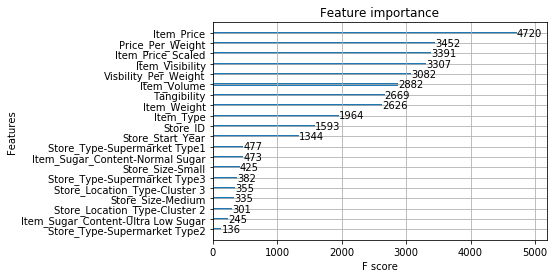

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [ ]:
new_train.columns

Index(['Store_ID', 'Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_Price',
       'Store_Start_Year', 'Store_Location_Type-Cluster 2',
       'Store_Location_Type-Cluster 3', 'Store_Type-Supermarket Type1',
       'Store_Type-Supermarket Type2', 'Store_Type-Supermarket Type3',
       'Item_Sugar_Content-Normal Sugar', 'Item_Sugar_Content-Ultra Low Sugar',
       'Store_Size-Medium', 'Store_Size-Small', 'Price_Per_Weight',
       'Visbility_Per_Weight', 'Item_Volume', 'Tangibility',
       'Item_Price_Scaled'],
      dtype='object')

In [ ]:
exgb_cols = ['Item_Price', 'Price_Per_Weight', 'Item_Visibility', 'Visbility_Per_Weight', 'Item_Price_Scaled', 'Item_Volume', 'Tangibility', 'Item_Weight', 'Item_Type', 'Store_ID', 'Store_Start_Year','Item_Sugar_Content-Normal Sugar', 'Store_Type-Supermarket Type1', 'Store_Size-Medium','Store_Location_Type-Cluster 3', 'Store_Location_Type-Cluster 2','Store_Size-Small', 'Store_Type-Supermarket Type3', 'Item_Sugar_Content-Ultra Low Sugar','Store_Type-Supermarket Type2']

In [ ]:
#'Item_Price', 'Price_Per_Weight', 'Item_Visibility', 'Visbility_Per_Weight', 'Item_Price_Scaled', 'Item_Volume', 'Tangibility', 'Item_Weight'

In [ ]:
import xgboost as exgb
data_dmatrix = exgb.DMatrix(data=new_train[exgb_cols],label=y)

X_train_exgb, X_test_exgb, y_train, y_test = train_test_split(new_train[exgb_cols], y, test_size=0.2, random_state=123)

exg_reg = exgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.005,
                max_depth = 5, alpha = 1, n_estimators = 1150, min_child_weight=4)

exg_reg.fit(X_train_exgb,y_train)

pred_exgb = exg_reg.predict(X_test_exgb)

In [ ]:
np.sqrt(mean_squared_error(y_test, pred_exgb))

2935.0372529626798

In [ ]:
from sklearn.model_selection import cross_validate
crv = cross_validate(exg_reg, new_train[exgb_cols], y, scoring = 'neg_root_mean_squared_error', cv = 10)

In [ ]:
np.mean(crv['test_score'])

-2960.71954702959

In [ ]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.005,
                'max_depth': 3, 'alpha': 10}

cv_results = exgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=1500,metrics="rmse", as_pandas=True, seed=123)

In [ ]:
exg_reg

XGBRegressor(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.005, max_delta_step=0, max_depth=5,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=1150, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=1,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [ ]:
cv_results.tail()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
1495,2784.951416,30.437218,2945.804004,122.459773
1496,2784.882129,30.419933,2945.817432,122.462878
1497,2784.791211,30.435770,2945.838721,122.508455
1498,2784.693457,30.434940,2945.841260,122.497954
1499,2784.611719,30.432186,2945.844971,122.495796


In [ ]:
pred = mlp.predict(new_test)

In [ ]:
sub = pd.read_csv('SampleSubmission.csv')

In [ ]:
sub['Item_Store_Returns'] = pred

In [ ]:
sub.to_csv('Mlp1Submission4.csv', index = False)

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter = 2000, hidden_layer_sizes=(100,300,500,500,300,100), alpha = 0.00009, verbose=True )
X_train_mlp, X_test_mlp, y_train, y_test = train_test_split(new_train, y, test_size=0.2, random_state=123)
mlp.fit(X_train_mlp, y_train)
pred_mlp = mlp.predict(X_test_mlp)

Iteration 1, loss = 17662924.34344061
Iteration 2, loss = 8194909.92385606
Iteration 3, loss = 7349253.02235086
Iteration 4, loss = 7223463.77640938
Iteration 5, loss = 7161286.91251178
Iteration 6, loss = 7189844.51682260
Iteration 7, loss = 7078836.53238778
Iteration 8, loss = 7028088.70060904
Iteration 9, loss = 6965096.52604798
Iteration 10, loss = 6910343.62834767
Iteration 11, loss = 6908812.96832987
Iteration 12, loss = 6879837.29270689
Iteration 13, loss = 6791195.92758156
Iteration 14, loss = 6835933.85889943
Iteration 15, loss = 6755720.29661977
Iteration 16, loss = 6752575.08033045
Iteration 17, loss = 6700855.49316610
Iteration 18, loss = 6668170.44863672
Iteration 19, loss = 6697329.54196869
Iteration 20, loss = 6711857.06997845
Iteration 21, loss = 6670092.11717546
Iteration 22, loss = 6594900.39265848
Iteration 23, loss = 6476368.49182301
Iteration 24, loss = 6451467.02589596
Iteration 25, loss = 6480826.83942468
Iteration 26, loss = 6335441.58505084
Iteration 27, loss =

In [ ]:
np.sqrt(mean_squared_error(y_test, pred_mlp))

2922.526621966595

(6,)

In [ ]:
'''from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter = 2000, hidden_layer_sizes=(200,200,50), alpha = 0.001, verbose=True )
X_train_mlp, X_test_mlp, y_train, y_test = train_test_split(new_train, y, test_size=0.2, random_state=123)
mlp.fit(X_train_mlp, y_train)
pred_mlp = mlp.predict(X_test_mlp)


from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter = 2000, hidden_layer_sizes=(20,300,200,100,60), alpha = 0.0005, verbose=True )
X_train_mlp, X_test_mlp, y_train, y_test = train_test_split(new_train, y, test_size=0.2, random_state=123)
mlp.fit(X_train_mlp, y_train)
pred_mlp = mlp.predict(X_test_mlp)

from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter = 2000, hidden_layer_sizes=(20,300,200,100,60), alpha = 0.0005, verbose=True )
X_train_mlp, X_test_mlp, y_train, y_test = train_test_split(new_train, y, test_size=0.2, random_state=123)
mlp.fit(X_train_mlp, y_train)
pred_mlp = mlp.predict(X_test_mlp)

from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter = 2000, hidden_layer_sizes=(20,400,300,300,100,30), alpha = 0.0005, verbose=True )
X_train_mlp, X_test_mlp, y_train, y_test = train_test_split(new_train, y, test_size=0.2, random_state=123)
mlp.fit(X_train_mlp, y_train)
pred_mlp = mlp.predict(X_test_mlp)

from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter = 2000, hidden_layer_sizes=(100,300,500,300,100), alpha = 0.0005, verbose=True )
X_train_mlp, X_test_mlp, y_train, y_test = train_test_split(new_train, y, test_size=0.2, random_state=123)
mlp.fit(X_train_mlp, y_train)
pred_mlp = mlp.predict(X_test_mlp)

from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter = 2000, hidden_layer_sizes=(100,300,500,500,300,100), alpha = 0.0005, verbose=True )
X_train_mlp, X_test_mlp, y_train, y_test = train_test_split(new_train, y, test_size=0.2, random_state=123)
mlp.fit(X_train_mlp, y_train)
pred_mlp = mlp.predict(X_test_mlp)'''